In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import sys
import sklearn
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_all.shape, y_train_all.shape)

# 划分训练集和验证集
x_train, x_valid = x_train_all[:55000], x_train_all[55000:]
y_train, y_valid = y_train_all[:55000], y_train_all[55000:]


(60000, 28, 28) (60000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 归一化
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28) # 展开

x_valid_scaled = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28) # 展开

x_test_scaled = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28) # 展开

In [4]:
print(x_test.astype(np.float32).reshape(-1, 1).shape, x_test_scaled.shape)

print(np.max(x_train_scaled), np.min(x_train_scaled))

(7840000, 1) (10000, 28, 28)
2.0235405 -0.8098248


In [5]:
# 模型1
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

# 模型2
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))


# 
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [6]:
print("x train:", x_train.shape, " x train scaled:", x_train_scaled.shape)

x train: (55000, 28, 28)  x train scaled: (55000, 28, 28)


In [7]:
# 回调函数试验
logdir = ".\callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

# 回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train, y_train, epochs=15, 
                    validation_data=(x_valid, y_valid),
                   callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/15
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4814 - accuracy: 0.8308 - val_loss: 0.3934 - val_accuracy: 0.8546
Epoch 2/15
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3713 - accuracy: 0.8659 - val_loss: 0.3871 - val_accuracy: 0.8606
Epoch 3/15
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3342 - accuracy: 0.8775 - val_loss: 0.3608 - val_accuracy: 0.8652
Epoch 4/15
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3109 - accuracy: 0.8865 - val_loss: 0.3658 - val_accuracy: 0.8656
Epoch 5/15
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2930 - accuracy: 0.8930 - val_loss: 0.4113 - val_accuracy: 0.8466
Epoch 6/15
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2780 - accuracy: 0.8974 - val_loss: 0.3500 - val_accuracy: 0.8720
Epoch 7/15
55000/55000 [==============================] 

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

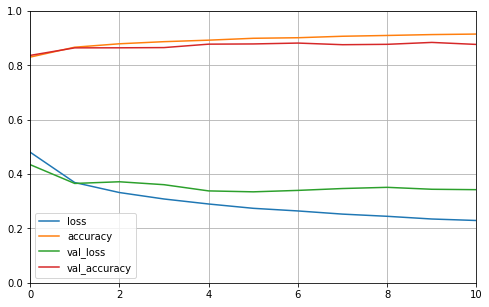

In [11]:
plot_learning_curves(history)

In [12]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3587452062606811, 0.8762]

In [ ]:



# 回调函数试验
logdir = ".\callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

# 回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train, y_train, epochs=15, 
                    validation_data=(x_valid, y_valid),
                   callbacks=callbacks)